In [ ]:
# Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import numpy as np

In [ ]:
# Lendo dataset
df = pd.read_excel('dataset_bbb.xlsx', index_col=None)

In [ ]:
# Exibindo os 6 primeiros registros
df.head(6)

,Edição,Ano de edição,Nome Completo,Data de Nascimento,Gênero,Cor,Idade,LGBTQIA+,Profissão,Categoria Profissional,Camarote,Cidade de nascimento,Estado de nascimento,Região de nascimento,Colocação,Posição,Meio de indicação,Eliminação (%),Finalista (%),Rejeição (%)
0,1,2002,Kleber de Paula Pedra,1978-02-14,Masculino,Branca,23,Não,Dançarino,Artes e Design,Não,Campinas,São Paulo,Sudeste,Vencedor,1.0,Finalista,NaN,68.0,32.0
1,1,2002,Vanessa Melani Pascale Ekypenyong Walborn,1974-11-28,Feminino,Preta,27,Não,Modelo,Artes e Design,Não,Rio de Janeiro,Rio de Janeiro,Sudeste,2º lugar,2.0,Finalista,NaN,21.0,79.0
2,1,2002,André Batista de Carvalho,1974-11-28,Masculino,Preta,27,Sim,Professor de Canto,Artes e Design,Não,Rio de Janeiro,Rio de Janeiro,Sudeste,3º lugar,3.0,Finalista,NaN,11.0,89.0
3,1,2002,Antonio Sergio Tavares Campo,1972-12-06,Masculino,Branca,29,Não,Cabeleireiro,Administração e Serviços,Não,Estrangeiro,Estrangeiro,Estrangeiro,9º eliminado,4.0,Líder,52.0,NaN,52.0
4,1,2002,Alessandra Begliomini,1974-12-05,Feminino,Branca,27,Não,Empresária,Administração e Serviços,Não,São Paulo,São Paulo,Sudeste,8ª eliminada,5.0,Líder,73.0,NaN,73.0
5,1,2002,Estela Padilha,1978-09-27,Feminino,Branca,23,Não,Videografista,Artes e Design,Não,São Paulo,São Paulo,Sudeste,7ª eliminada,6.0,Líder,85.0,NaN,85.0


In [ ]:
# Renomeando colunas para maior facilidade em comandos
df = df.rename(columns={"Edição": "edicao", "Ano de edição": "ano_edicao", "Nome Completo": "nome", "Data de Nascimento": "data_nascimento", "Gênero": "genero", "Cor": "cor", "Idade": "idade", "LGBTQIA+": "lgbtqia", "Profissão": "profissao", "Categoria Profissional": "cat_profissional", "Camarote": "camarote", "Cidade de nascimento": "cidade_nasc", "Estado de nascimento": "estado_nasc", "Região de nascimento": "regiao_nasc", "Colocação": "colocacao", "Posição": "posicao", "Meio de indicação": "indicacao", "Eliminação (%)": "eliminacao", "Finalista (%)": "final", "Rejeição (%)": "rejeicao"})

In [ ]:
# Criação de uma nova coluna: finalista
def ff(df):
    if df['indicacao'] == 'Finalista':
        val = 1
    else:
        val = 0
    return val

df['finalista'] = df.apply(ff, axis=1)

In [ ]:
# Criação de uma nova coluna: vencedor
def fv(df):
    if df['colocacao'] == 'Vencedor':
        val = 1
    else:
        val = 0
    return val

df['vencedor'] = df.apply(fv, axis=1)

In [ ]:
# Criação de uma nova coluna: ultimas_edicoes, em que 1 evidencia participantes da edição 11 a 21
def fu(df):
    if df['edicao'] > 10:
        val = 1
    else:
        val = 0
    return val

df['ultimas_edicoes'] = df.apply(fu, axis=1)

In [ ]:
# Verificação das alterações e acréscimos
df.head()

,edicao,ano_edicao,nome,data_nascimento,genero,cor,idade,lgbtqia,profissao,cat_profissional,camarote,cidade_nasc,estado_nasc,regiao_nasc,colocacao,posicao,indicacao,eliminacao,final,rejeicao,finalista,vencedor,ultimas_edicoes
0,1,2002,Kleber de Paula Pedra,1978-02-14,Masculino,Branca,23,Não,Dançarino,Artes e Design,Não,Campinas,São Paulo,Sudeste,Vencedor,1.0,Finalista,NaN,68.0,32.0,1,1,0
1,1,2002,Vanessa Melani Pascale Ekypenyong Walborn,1974-11-28,Feminino,Preta,27,Não,Modelo,Artes e Design,Não,Rio de Janeiro,Rio de Janeiro,Sudeste,2º lugar,2.0,Finalista,NaN,21.0,79.0,1,0,0
2,1,2002,André Batista de Carvalho,1974-11-28,Masculino,Preta,27,Sim,Professor de Canto,Artes e Design,Não,Rio de Janeiro,Rio de Janeiro,Sudeste,3º lugar,3.0,Finalista,NaN,11.0,89.0,1,0,0
3,1,2002,Antonio Sergio Tavares Campo,1972-12-06,Masculino,Branca,29,Não,Cabeleireiro,Administração e Serviços,Não,Estrangeiro,Estrangeiro,Estrangeiro,9º eliminado,4.0,Líder,52.0,NaN,52.0,0,0,0
4,1,2002,Alessandra Begliomini,1974-12-05,Feminino,Branca,27,Não,Empresária,Administração e Serviços,Não,São Paulo,São Paulo,Sudeste,8ª eliminada,5.0,Líder,73.0,NaN,73.0,0,0,0


In [ ]:
# Análise de variáveis que contém registros vazios
df.isnull().any()

edicao              False
ano_edicao          False
nome                False
data_nascimento     False
genero              False
cor                 False
idade               False
lgbtqia             False
profissao           False
cat_profissional    False
camarote            False
cidade_nasc         False
estado_nasc         False
regiao_nasc         False
colocacao           False
posicao              True
indicacao           False
eliminacao           True
final                True
rejeicao             True
finalista           False
vencedor            False
ultimas_edicoes     False
dtype: bool

In [ ]:
# Análise do tipo de cada variável
df.dtypes

edicao                       int64
ano_edicao                   int64
nome                        object
data_nascimento     datetime64[ns]
genero                      object
cor                         object
idade                        int64
lgbtqia                     object
profissao                   object
cat_profissional            object
camarote                    object
cidade_nasc                 object
estado_nasc                 object
regiao_nasc                 object
colocacao                   object
posicao                    float64
indicacao                   object
eliminacao                 float64
final                      float64
rejeicao                   float64
finalista                    int64
vencedor                     int64
ultimas_edicoes              int64
dtype: object

In [ ]:
# Visualização da quantidade de linhas e colunas do dataset
df.shape

(338, 23)

In [ ]:
# Resumo estatítico de variáveis quantitativas
df.describe()

,edicao,ano_edicao,idade,posicao,eliminacao,final,rejeicao,finalista,vencedor,ultimas_edicoes
count,338.000000,338.000000,338.000000,325.000000,270.000000,55.000000,325.000000,338.000000,338.00000,338.00000
mean,11.588757,2011.624260,28.437870,8.387692,64.669889,38.243455,64.176862,0.162722,0.06213,0.56213
std,5.978656,5.918156,7.449373,4.782669,12.844592,23.171344,15.088381,0.369659,0.24175,0.49686
min,1.000000,2002.000000,18.000000,1.000000,33.000000,1.000000,8.000000,0.000000,0.00000,0.00000
25%,7.000000,2007.000000,24.000000,4.000000,55.000000,21.045000,54.000000,0.000000,0.00000,0.00000
50%,12.000000,2012.000000,27.000000,8.000000,62.405000,35.000000,62.620000,0.000000,0.00000,1.00000
75%,17.000000,2017.000000,31.000000,12.000000,73.922500,54.000000,74.000000,0.000000,0.00000,1.00000
max,21.000000,2021.000000,70.000000,20.000000,99.170000,92.000000,99.170000,1.000000,1.00000,1.00000


In [ ]:
# Instalação de um módulo a ser utilizado
!pip install sweetviz

     |████████████████████████████████| 15.1 MB 4.4 MB/s 


In [ ]:
import sweetviz as sv

In [ ]:
my_report = sv.analyze(df)
my_report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
dfs = df.drop(columns=['data_nascimento'])

In [ ]:
my_report2 = sv.compare_intra(dfs, dfs["edicao"] < 11,["Primeiras Edicoes", "Ultimas Edicoes"])
my_report2.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
c = df['indicacao'].value_counts()
p = df['indicacao'].value_counts(normalize=True)
pd.concat([c,p], axis=1, keys=['Contagem', '%'])

,Contagem,%
Líder,140,0.414201
Casa,95,0.281065
Finalista,55,0.162722
Prova do Líder,11,0.032544
Big Fone,10,0.029586
Expulso,6,0.017751
Desistente,6,0.017751
Prova do Finalista,4,0.011834
Contragolpe,2,0.005917
Prova Surpresa,1,0.002959


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


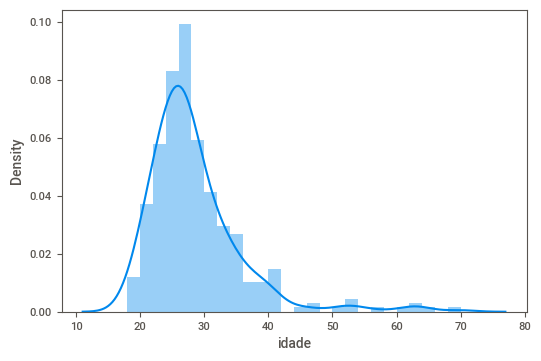

In [ ]:
sns.distplot(df['idade'])

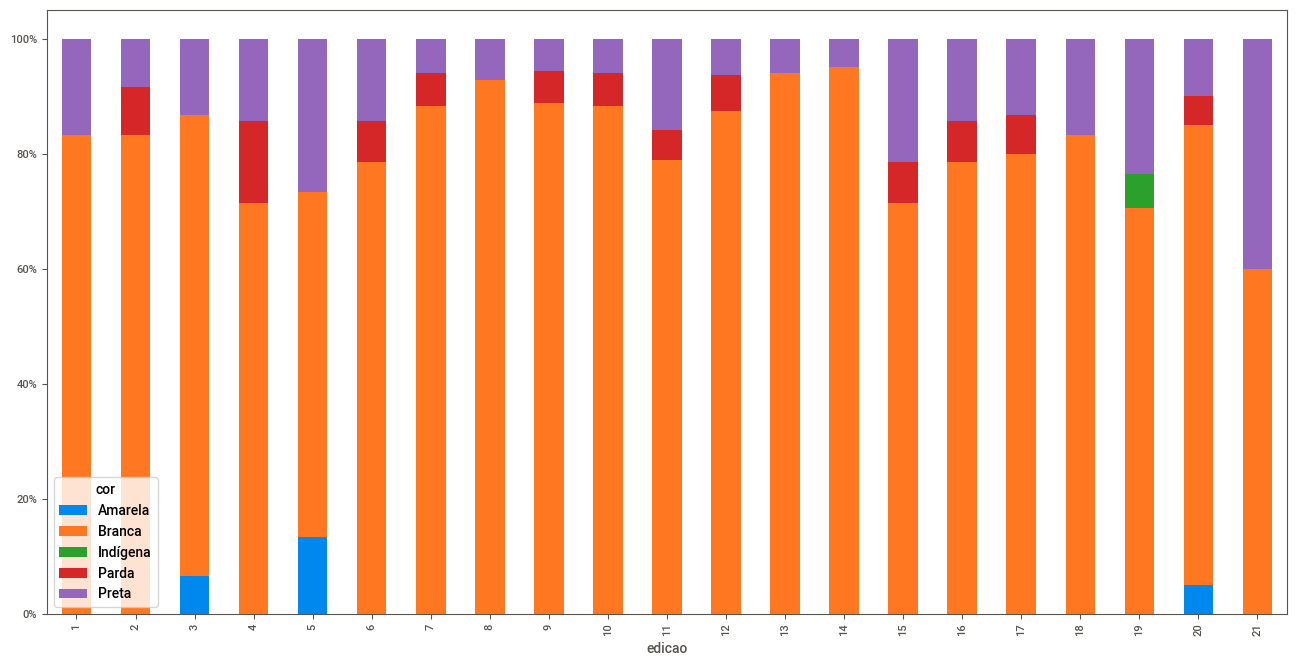

In [ ]:
# Análise de diversidade de cor dentre as 21 edições do programa
df.groupby(['edicao','cor']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',figsize=(16,8),stacked=True)

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

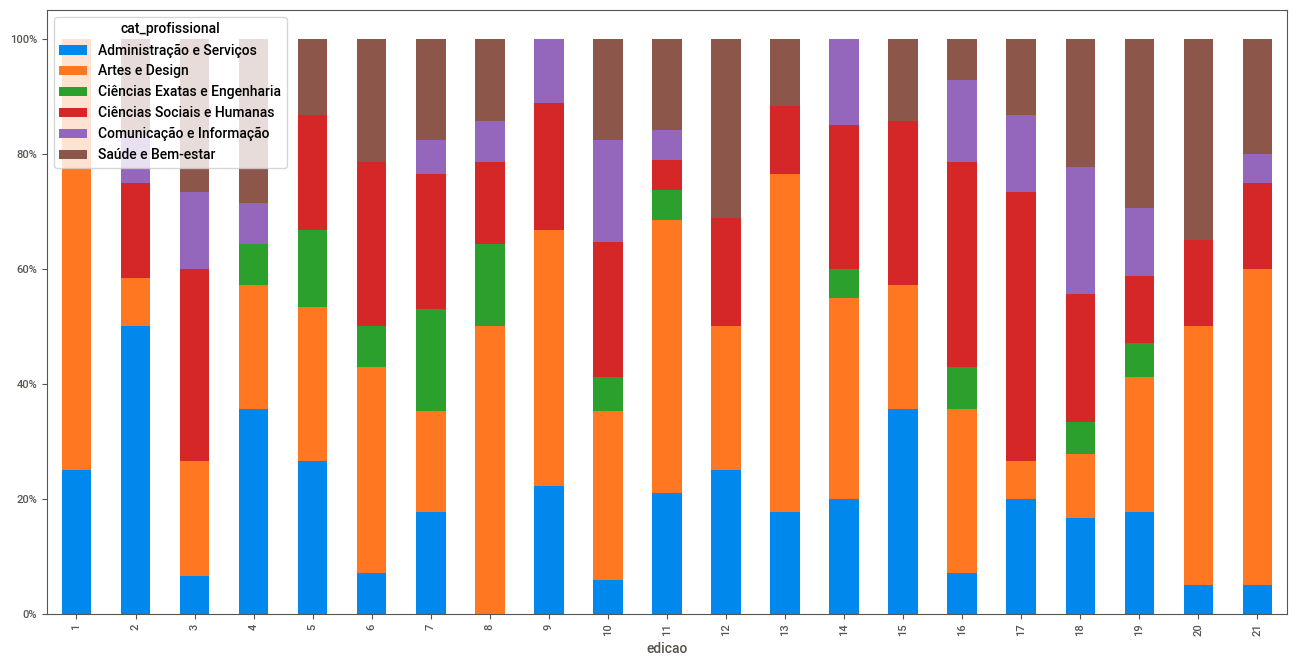

In [ ]:
# Análise de profissões dentre as 21 edições do programa
df.groupby(['edicao','cat_profissional']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',figsize=(16,8),stacked=True)

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

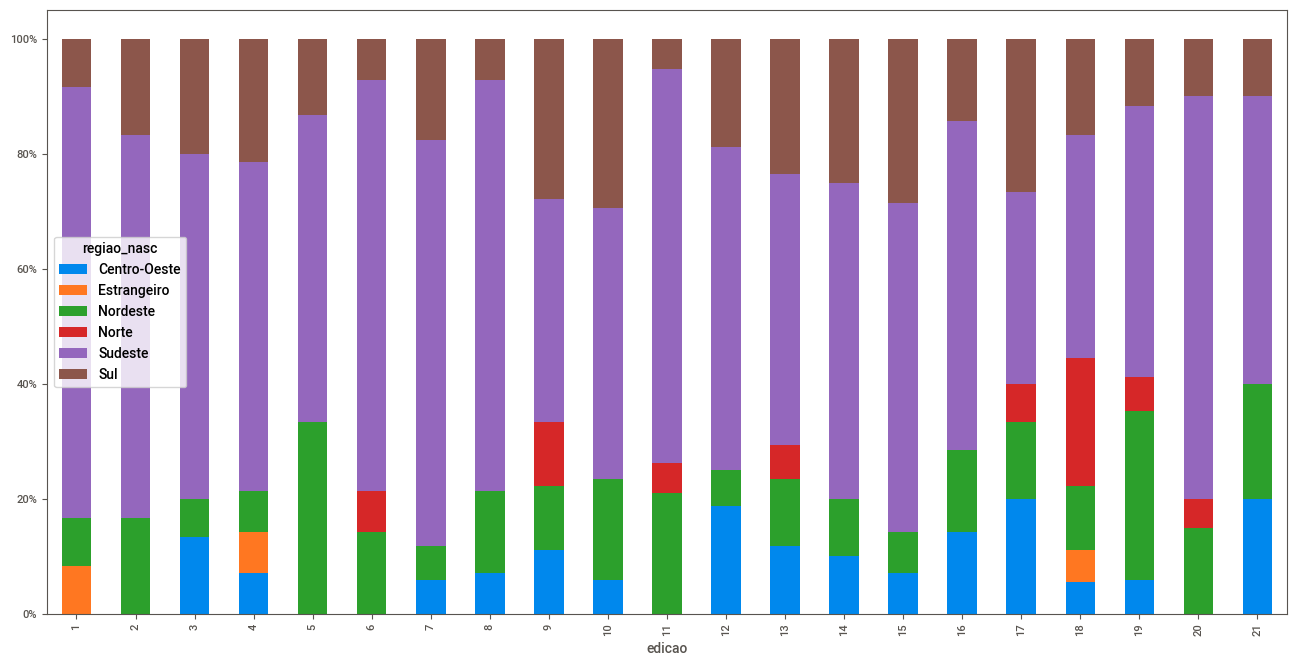

In [ ]:
# Análise de regiões dentre as 21 edições do programa
df.groupby(['edicao','regiao_nasc']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',figsize=(16,8),stacked=True)

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

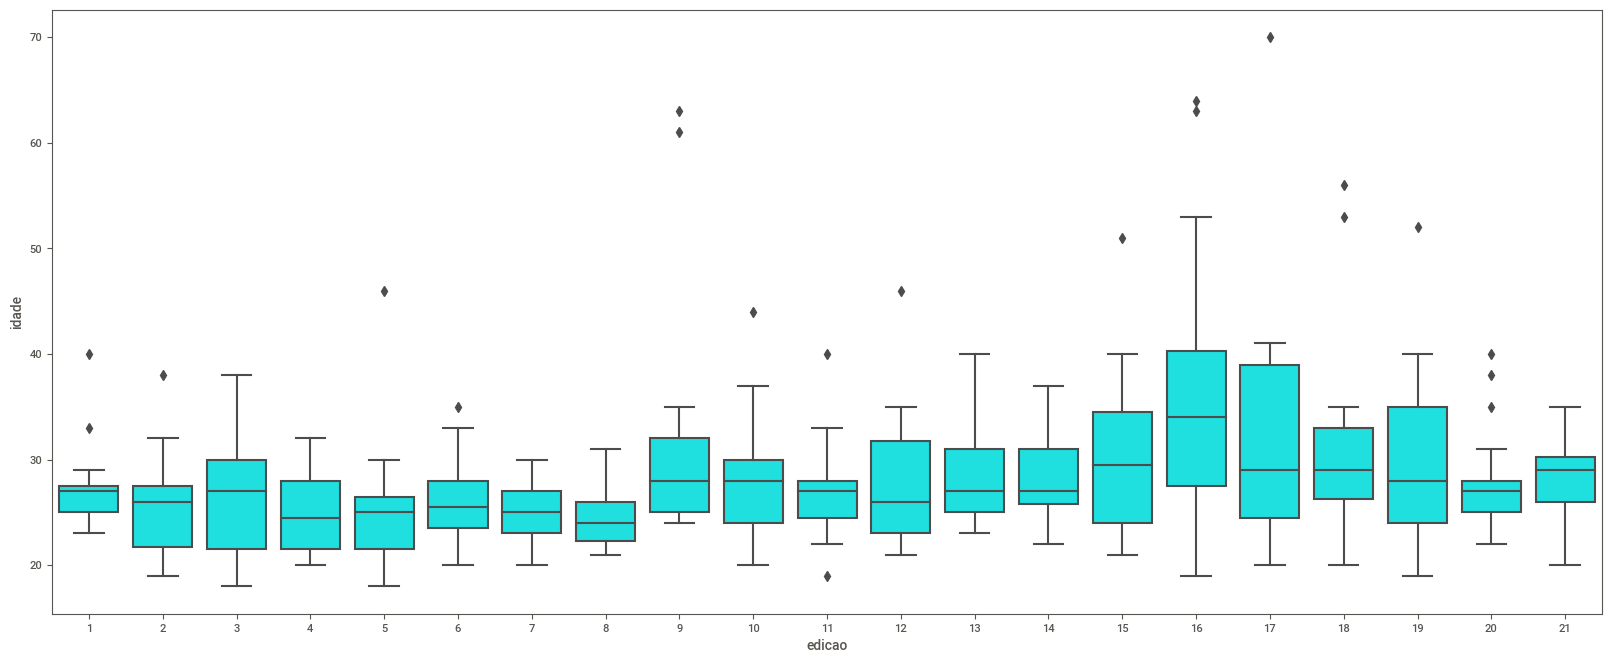

In [ ]:
fig = plt.figure(figsize=(20,8))

sns.boxplot(x='edicao',y='idade',data=df,color='cyan')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


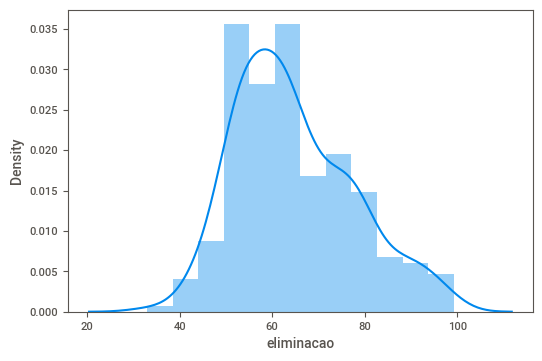

In [ ]:
sns.distplot(df['eliminacao'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


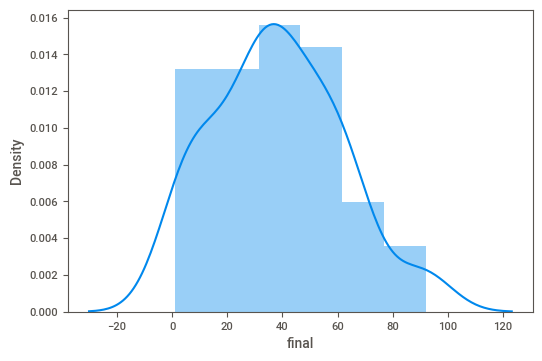

In [ ]:
sns.distplot(df['final'])

In [ ]:
grouped_multiple = df.groupby(['genero', 'ultimas_edicoes']).agg({'finalista': ['mean', 'sum', 'count']})
grouped_multiple.columns = ['percentual', 'finalistas', 'total']
grouped_multiple = grouped_multiple.reset_index()
print(grouped_multiple)

      genero  ultimas_edicoes  percentual  finalistas  total
0   Feminino                0    0.162162          12     74
1   Feminino                1    0.218750          21     96
2  Masculino                0    0.175676          13     74
3  Masculino                1    0.095745           9     94


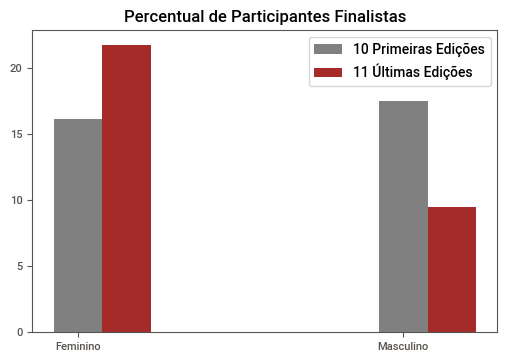

In [ ]:
primeiras = [16.2,17.5]
ultimas = [21.8,9.5]

x1 =  np.arange(len(primeiras))
x2 = [x + 0.15 for x in x1]

# Plota as barras
plt.bar(x1, primeiras, width=0.15, label = '10 Primeiras Edições', color = 'gray')
plt.bar(x2, ultimas, width=0.15, label = '11 Últimas Edições', color = 'brown')

genero = ['Feminino','Masculino']
plt.xticks([x for x in range(len(primeiras))], genero)

# inseri uma legenda no gráfico
plt.legend()

plt.title("Percentual de Participantes Finalistas")
plt.show()

In [ ]:
grouped_multiple = df.groupby(['genero', 'ultimas_edicoes']).agg({'vencedor': ['mean', 'sum', 'count']})
grouped_multiple.columns = ['percentual', 'vencedores', 'total']
grouped_multiple = grouped_multiple.reset_index()
print(grouped_multiple)

      genero  ultimas_edicoes  percentual  vencedores  total
0   Feminino                0    0.027027           2     74
1   Feminino                1    0.093750           9     96
2  Masculino                0    0.108108           8     74
3  Masculino                1    0.021277           2     94


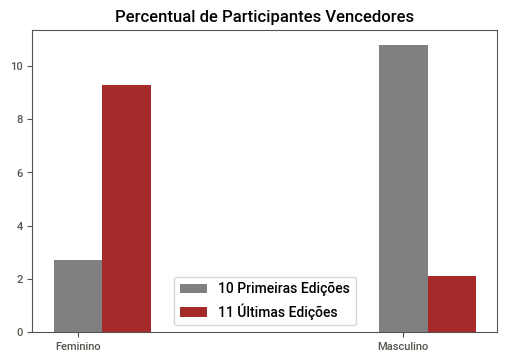

In [ ]:
primeiras = [2.7,10.8]
ultimas = [9.3,2.1]

x1 =  np.arange(len(primeiras))
x2 = [x + 0.15 for x in x1]

# Plota as barras
plt.bar(x1, primeiras, width=0.15, label = '10 Primeiras Edições', color = 'gray')
plt.bar(x2, ultimas, width=0.15, label = '11 Últimas Edições', color = 'brown')

genero = ['Feminino','Masculino']
plt.xticks([x for x in range(len(primeiras))], genero)

# inseri uma legenda no gráfico
plt.legend()

plt.title("Percentual de Participantes Vencedores")
plt.show()

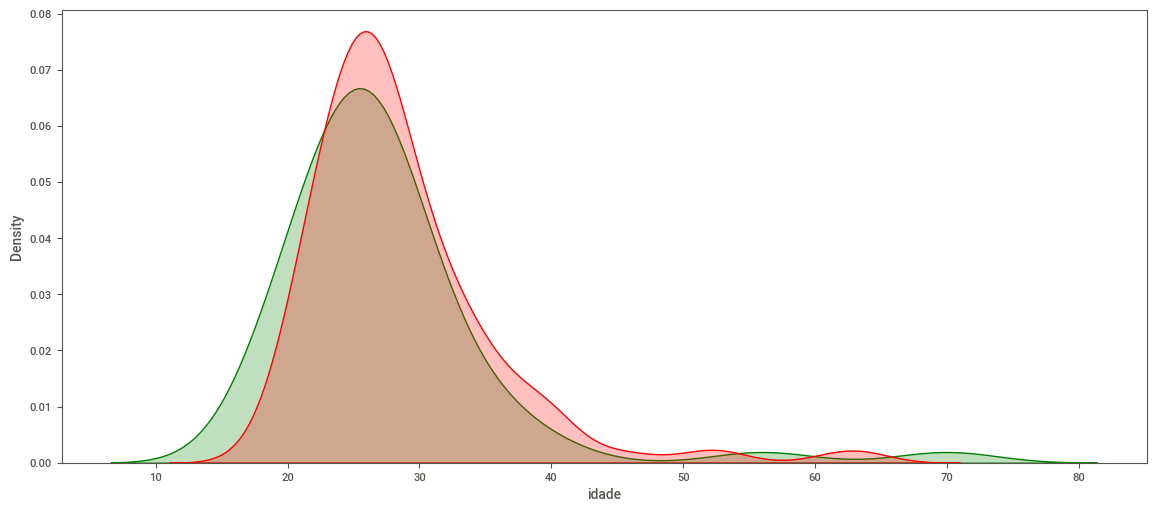

In [ ]:
# Análise de Correlação entre Idade e Finalista a partir de Gráfico de Densidade
fig = plt.figure(figsize=(14,6))
ax=sns.kdeplot(df.loc[(df['finalista']==1),'idade'],color='g',shade=True)
ax=sns.kdeplot(df.loc[(df['finalista']==0),'idade'],color='r',shade=True)
# plt.title('Análise de Correlação entre Idade e Finalista a partir de Gráfico de Densidade')

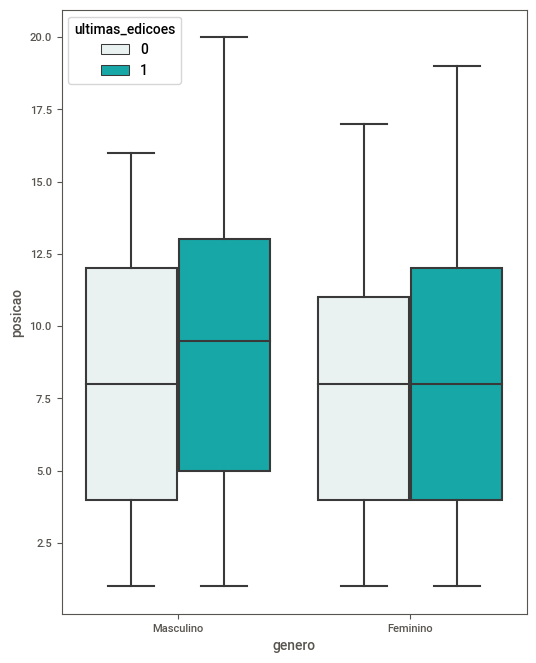

In [ ]:
# Análise de posição, genêro e últimas ediçõoes
fig = plt.figure(figsize=(6,8))

sns.boxplot(x='genero',y='posicao',data=df,color='c',hue="ultimas_edicoes")

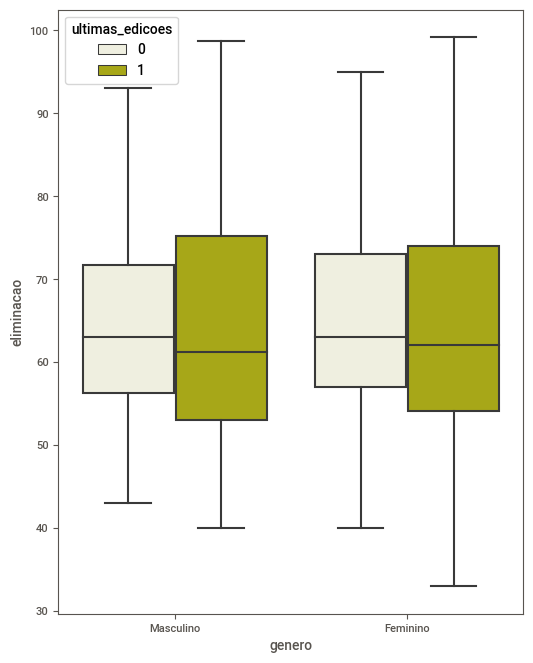

In [ ]:
fig = plt.figure(figsize=(6,8))

sns.boxplot(x='genero',y='eliminacao',data=df,color='y',hue="ultimas_edicoes")

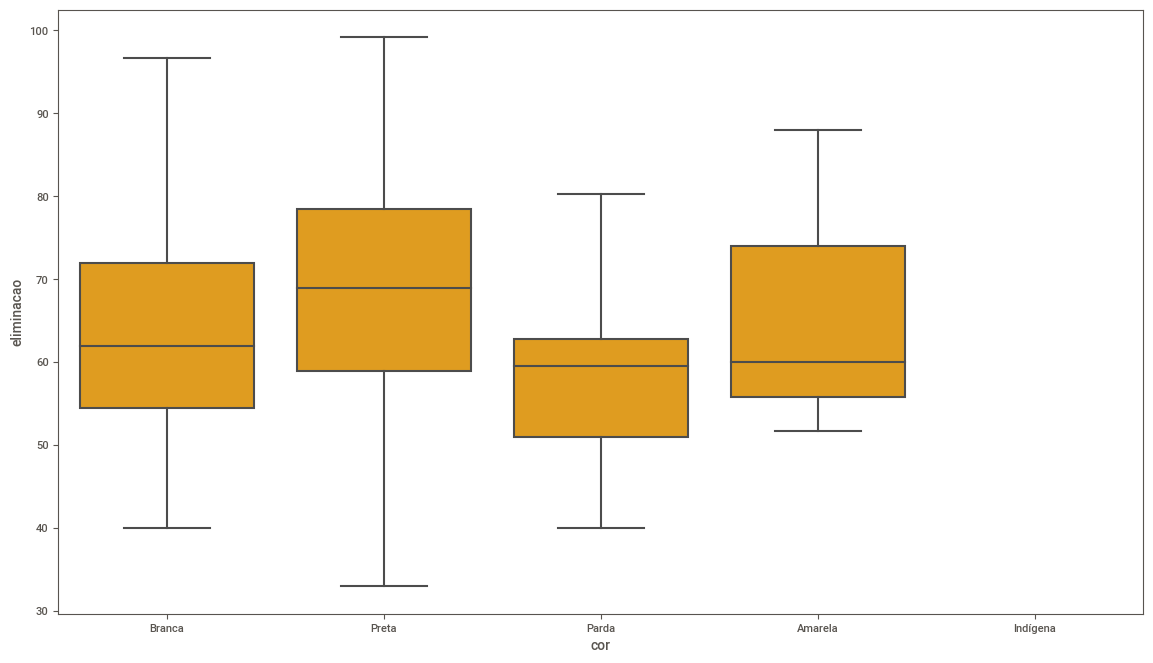

In [ ]:
fig = plt.figure(figsize=(14,8))

sns.boxplot(x='cor',y='eliminacao',data=df,color='orange')

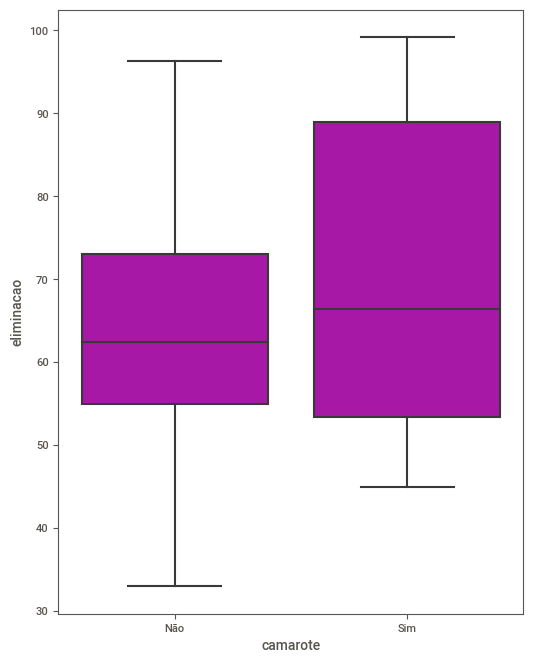

In [ ]:
fig = plt.figure(figsize=(6,8))

sns.boxplot(x='camarote',y='eliminacao',data=df,color='m')

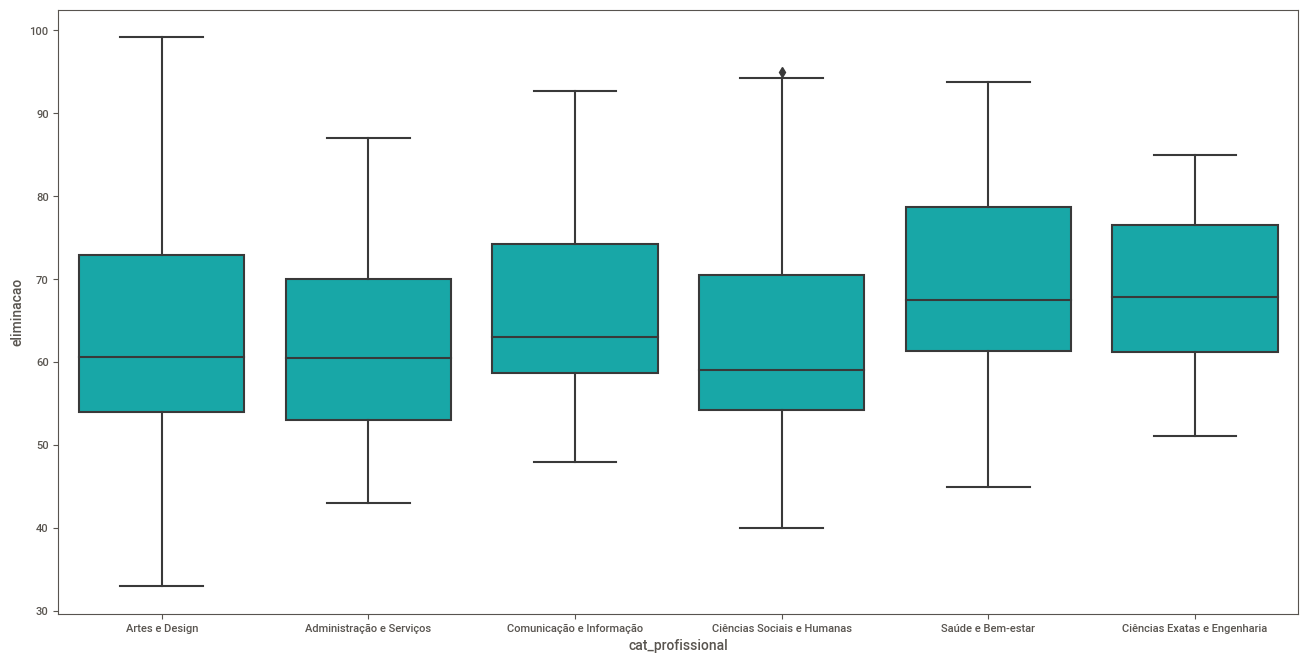

In [ ]:
fig = plt.figure(figsize=(16,8))

sns.boxplot(x='cat_profissional',y='eliminacao',data=df,color='c')

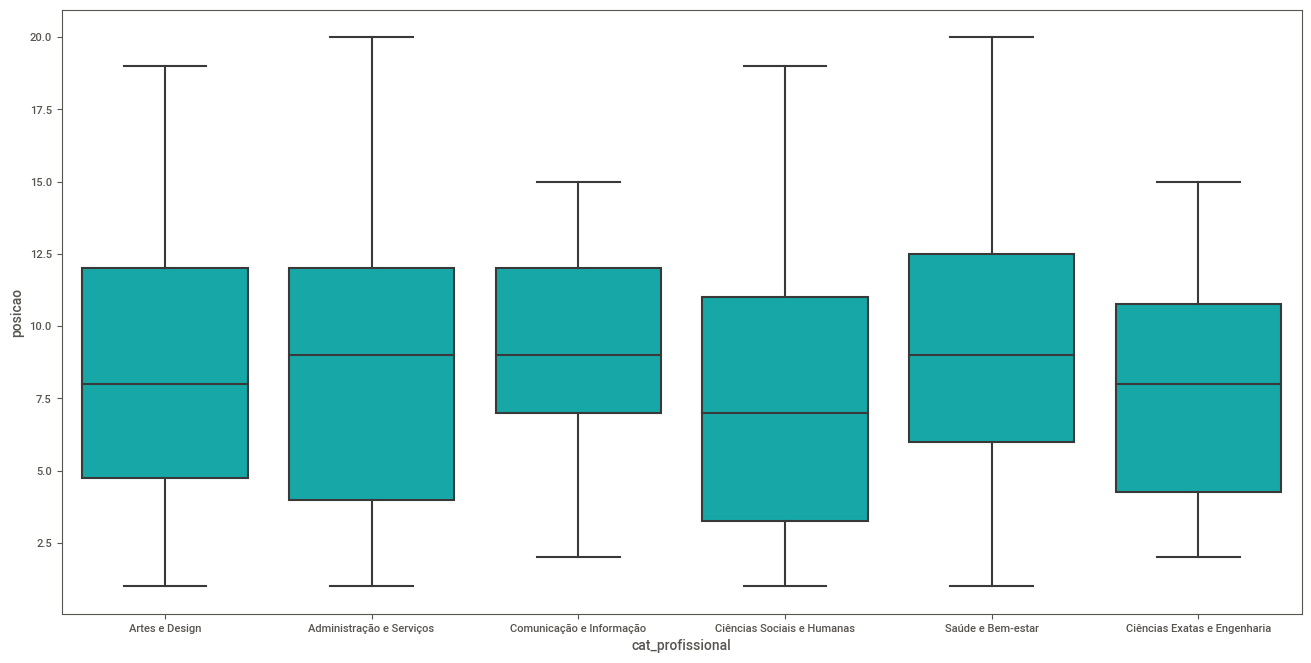

In [ ]:
fig = plt.figure(figsize=(16,8))

sns.boxplot(x='cat_profissional',y='posicao',data=df,color='c')

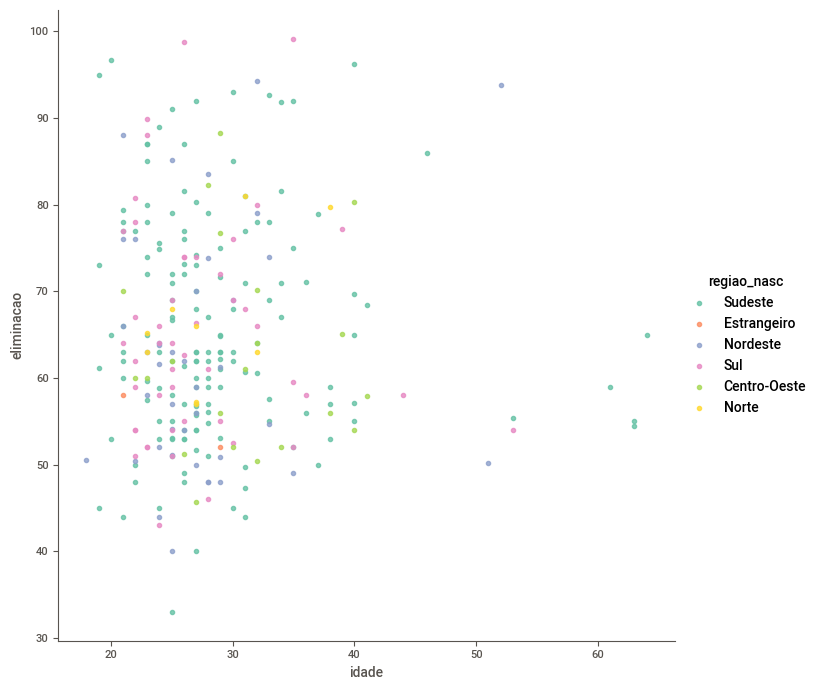

In [ ]:
sns.lmplot(x='idade',y='eliminacao',data=df,fit_reg=False,hue='regiao_nasc',palette='Set2',height=7)

In [ ]:
# Copiando um novo dataset para transformação de variáveis qualitativas
dfa = df.copy()

In [ ]:
dfa['cat_profissional'].replace(['Artes e Design','Administração e Serviços','Ciências Sociais e Humanas','Comunicação e Informação',
                    'Saúde e Bem-estar','Ciências Exatas e Engenharia'],
                   [0,1,2,3,4,5],inplace=True)
dfa['lgbtqia'].replace(['Não','Sim'],[0,1],inplace=True)
dfa['camarote'].replace(['Não','Sim'],[0,1],inplace=True)
dfa['cor'].replace(['Branca','Preta','Parda','Amarela','Indígena'],[0,1,2,3,4],inplace=True)
dfa['regiao_nasc'].replace(['Sudeste','Centro-Oeste','Nordeste','Sul','Norte', 'Estrangeiro'],[0,1,2,3,4,5],inplace=True)
dfa['genero'].replace(['Masculino','Feminino'],[0,1],inplace=True)

,edicao,ano_edicao,genero,cor,idade,lgbtqia,cat_profissional,camarote,regiao_nasc,posicao,eliminacao,final,rejeicao,finalista,vencedor,ultimas_edicoes
edicao,1.000000,0.999566,0.007842,0.011778,0.208798,0.136197,0.029635,0.365376,0.068558,0.140102,0.049902,-0.096684,0.061356,-0.016624,-0.025384,0.855214
ano_edicao,0.999566,1.000000,0.007886,0.010954,0.210310,0.137300,0.024469,0.367645,0.068235,0.139112,0.050770,-0.100082,0.062689,-0.015374,-0.025116,0.857150
genero,0.007842,0.007886,1.000000,0.050439,-0.134789,-0.031850,-0.100186,0.011401,0.056306,-0.088111,0.024763,-0.063339,0.027677,0.085562,0.010734,0.005222
cor,0.011778,0.010954,0.050439,1.000000,-0.072494,0.037490,-0.007367,0.104480,-0.098464,-0.094456,0.067693,-0.115528,0.074875,0.098086,0.049286,-0.009994
idade,0.208798,0.210310,-0.134789,-0.072494,1.000000,0.051659,-0.020918,-0.023001,-0.051390,0.042971,-0.002740,-0.235588,0.070631,-0.060434,-0.034924,0.191452
lgbtqia,0.136197,0.137300,-0.031850,0.037490,0.051659,1.000000,-0.052897,0.092824,-0.059746,0.035056,0.003352,-0.074974,0.021803,-0.009987,-0.002077,0.109490
cat_profissional,0.029635,0.024469,-0.100186,-0.007367,-0.020918,-0.052897,1.000000,-0.172200,-0.000929,0.044396,0.157098,0.046288,0.101412,-0.016038,0.023080,-0.020308
camarote,0.365376,0.367645,0.011401,0.104480,-0.023001,0.092824,-0.172200,1.000000,-0.106178,0.081755,0.105860,-0.265983,0.147957,0.031608,-0.062815,0.215395
regiao_nasc,0.068558,0.068235,0.056306,-0.098464,-0.051390,-0.059746,-0.000929,-0.106178,1.000000,0.004116,-0.040839,0.176567,-0.075268,-0.003419,-0.003308,0.042260
posicao,0.140102,0.139112,-0.088111,-0.094456,0.042971,0.035056,0.044396,0.081755,0.004116,1.000000,-0.027204,-0.829235,0.062840,-0.617477,-0.406612,0.111328


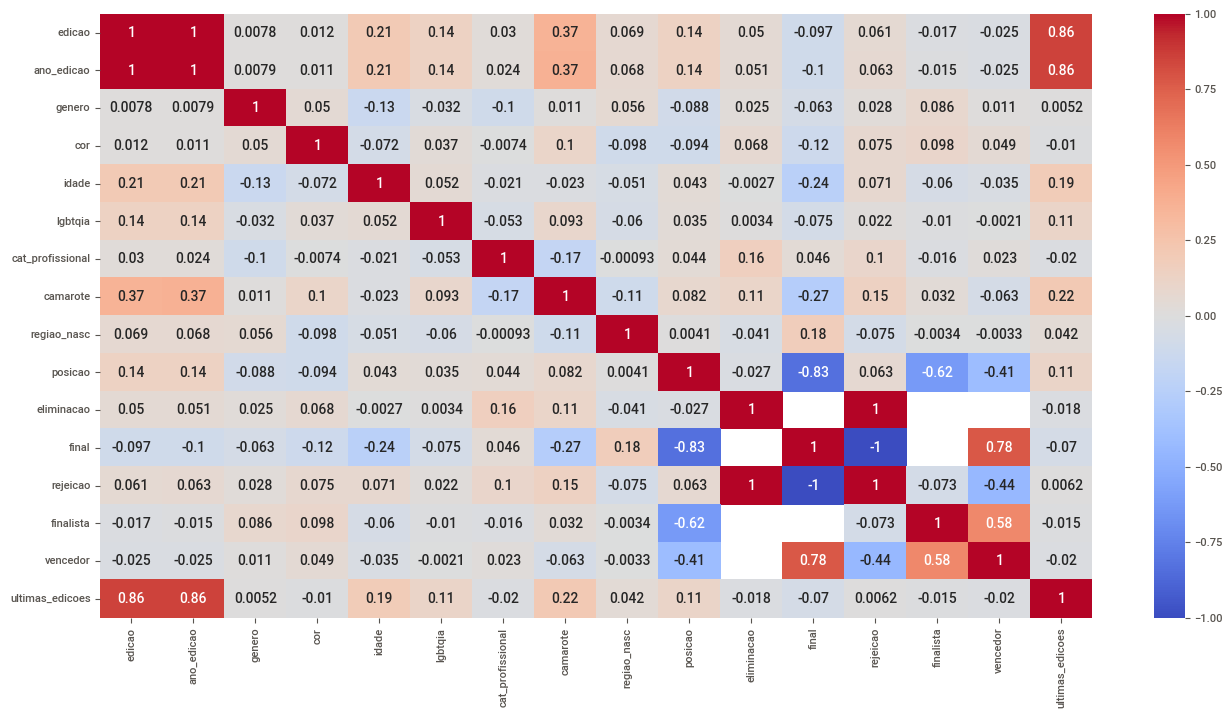

In [ ]:
plt.figure(figsize=(16,8))

correlacao = dfa.corr()
correlacao = (correlacao)
sns.heatmap(correlacao,xticklabels=correlacao.columns.values,yticklabels=correlacao.columns.values,annot=True,vmin=-1,vmax=1,cmap='coolwarm',linewidths=0)

correlacao

In [ ]:
# Análise de correlações entre variáveis
pd.crosstab(df["cor"],df["finalista"],margins=True)

finalista,0,1,All
cor,,,
0,231,42,273
1,42,5,47
2,6,7,13
3,3,1,4
4,1,0,1
All,283,55,338


In [ ]:
cat_profissional = df.groupby('cat_profissional')
cat_profissional.mean()
#'Artes e Design' 0,'Administração e Serviços' 1,'Ciências Sociais e Humanas' 2,'Comunicação e Informação' 3,
#                    'Saúde e Bem-estar' 4,'Ciências Exatas e Engenharia' 5

,edicao,ano_edicao,genero,cor,idade,lgbtqia,camarote,regiao_nasc,posicao,eliminacao,final,rejeicao,finalista,vencedor
cat_profissional,,,,,,,,,,,,,,
0,5.854167,2006.041667,0.583333,0.250000,27.625000,0.083333,0.0,1.104167,7.833333,64.358974,38.162222,63.886250,0.187500,0.062500
1,4.678571,2004.785714,0.428571,0.321429,27.714286,0.035714,0.0,1.107143,7.240000,62.000000,57.500000,58.880000,0.142857,0.107143
2,6.357143,2006.357143,0.607143,0.250000,25.500000,0.035714,0.0,1.142857,7.571429,61.113182,35.590000,61.819643,0.214286,0.071429
3,6.818182,2006.818182,0.727273,0.272727,25.818182,0.181818,0.0,0.909091,8.272727,64.700000,35.000000,64.727273,0.090909,0.000000
4,5.521739,2005.521739,0.391304,0.217391,26.913043,0.043478,0.0,0.826087,8.434783,72.000000,36.750000,70.478261,0.173913,0.086957
5,6.700000,2006.700000,0.000000,0.400000,25.100000,0.000000,0.0,0.300000,7.555556,69.375000,31.000000,69.333333,0.100000,0.000000


In [ ]:
df.head()

,edicao,ano_edicao,nome,data_nascimento,genero_Masculino,genero_Feminino,cor_Branca,cor_Preta,cor_Parda,cor_Amarela,cor_Indígena,idade,lgbtqia_Não,lgbtqia_Sim,profissao,cat_profissional_Artes e Design,cat_profissional_Administração e Serviços,cat_profissional_Comunicação e Informação,cat_profissional_Ciências Sociais e Humanas,cat_profissional_Saúde e Bem-estar,cat_profissional_Ciências Exatas e Engenharia,camarote_Não,camarote_Sim,cidade_nasc,estado_nasc,regiao_nasc_Sudeste,regiao_nasc_Estrangeiro,regiao_nasc_Nordeste,regiao_nasc_Sul,regiao_nasc_Centro-Oeste,regiao_nasc_Norte,colocacao,posicao,indicacao,eliminacao,final,rejeicao,finalista,vencedor
0,1,2002,Kleber de Paula Pedra,1978-02-14,1,0,1,0,0,0,0,23,1,0,Dançarino,1,0,0,0,0,0,1,0,Campinas,São Paulo,1,0,0,0,0,0,Vencedor,1.0,Finalista,NaN,68.0,32.0,1,1
1,1,2002,Vanessa Melani Pascale Ekypenyong Walborn,1974-11-28,0,1,0,1,0,0,0,27,1,0,Modelo,1,0,0,0,0,0,1,0,Rio de Janeiro,Rio de Janeiro,1,0,0,0,0,0,2º lugar,2.0,Finalista,NaN,21.0,79.0,1,0
2,1,2002,André Batista de Carvalho,1974-11-28,1,0,0,1,0,0,0,27,0,1,Professor de Canto,1,0,0,0,0,0,1,0,Rio de Janeiro,Rio de Janeiro,1,0,0,0,0,0,3º lugar,3.0,Finalista,NaN,11.0,89.0,1,0
3,1,2002,Antonio Sergio Tavares Campo,1972-12-06,1,0,1,0,0,0,0,29,1,0,Cabeleireiro,0,1,0,0,0,0,1,0,Estrangeiro,Estrangeiro,0,1,0,0,0,0,9º eliminado,4.0,Líder,52.0,NaN,52.0,0,0
4,1,2002,Alessandra Begliomini,1974-12-05,0,1,1,0,0,0,0,27,1,0,Empresária,0,1,0,0,0,0,1,0,São Paulo,São Paulo,1,0,0,0,0,0,8ª eliminada,5.0,Líder,73.0,NaN,73.0,0,0


In [ ]:
c = df['vencedor'].value_counts()
p = df['vencedor'].value_counts(normalize=True)
pd.concat([c,p], axis=1, keys=['counts', '%'])

,counts,%
0,317,0.93787
1,21,0.06213


In [ ]:
c = df['finalista'].value_counts()
p = df['finalista'].value_counts(normalize=True)
pd.concat([c,p], axis=1, keys=['counts', '%'])

,counts,%
0,283,0.837278
1,55,0.162722


In [ ]:
# Instalação de um módulo a ser utilizado
!pip install category_encoders

     |████████████████████████████████| 82 kB 325 kB/s 


In [ ]:
from category_encoders.one_hot import OneHotEncoder

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Transformando a coluna gênero
enc = OneHotEncoder(cols=['genero'], use_cat_names=True)
df = enc.fit_transform(df)

In [ ]:
# Transformando a coluna cor
enc = OneHotEncoder(cols=['cor'], use_cat_names=True)
df = enc.fit_transform(df)

In [ ]:
# Transformando a coluna lgbtqia
enc = OneHotEncoder(cols=['lgbtqia'], use_cat_names=True)
df = enc.fit_transform(df)

In [ ]:
# Transformando a coluna cat_profissional
enc = OneHotEncoder(cols=['cat_profissional'], use_cat_names=True)
df = enc.fit_transform(df)

In [ ]:
# Transformando a coluna camarote
enc = OneHotEncoder(cols=['camarote'], use_cat_names=True)
df = enc.fit_transform(df)

In [ ]:
# Transformando a coluna regiao_nasc
enc = OneHotEncoder(cols=['regiao_nasc'], use_cat_names=True)
df = enc.fit_transform(df)

In [ ]:
df.head()

,edicao,ano_edicao,nome,data_nascimento,genero_Masculino,genero_Feminino,cor_Branca,cor_Preta,cor_Parda,cor_Amarela,cor_Indígena,idade,lgbtqia_Não,lgbtqia_Sim,profissao,cat_profissional_Artes e Design,cat_profissional_Administração e Serviços,cat_profissional_Comunicação e Informação,cat_profissional_Ciências Sociais e Humanas,cat_profissional_Saúde e Bem-estar,cat_profissional_Ciências Exatas e Engenharia,camarote_Não,camarote_Sim,cidade_nasc,estado_nasc,regiao_nasc_Sudeste,regiao_nasc_Estrangeiro,regiao_nasc_Nordeste,regiao_nasc_Sul,regiao_nasc_Centro-Oeste,regiao_nasc_Norte,colocacao,posicao,indicacao,eliminacao,final,rejeicao,finalista,vencedor,ultimas_edicoes
0,1,2002,Kleber de Paula Pedra,1978-02-14,1,0,1,0,0,0,0,23,1,0,Dançarino,1,0,0,0,0,0,1,0,Campinas,São Paulo,1,0,0,0,0,0,Vencedor,1.0,Finalista,NaN,68.0,32.0,1,1,0
1,1,2002,Vanessa Melani Pascale Ekypenyong Walborn,1974-11-28,0,1,0,1,0,0,0,27,1,0,Modelo,1,0,0,0,0,0,1,0,Rio de Janeiro,Rio de Janeiro,1,0,0,0,0,0,2º lugar,2.0,Finalista,NaN,21.0,79.0,1,0,0
2,1,2002,André Batista de Carvalho,1974-11-28,1,0,0,1,0,0,0,27,0,1,Professor de Canto,1,0,0,0,0,0,1,0,Rio de Janeiro,Rio de Janeiro,1,0,0,0,0,0,3º lugar,3.0,Finalista,NaN,11.0,89.0,1,0,0
3,1,2002,Antonio Sergio Tavares Campo,1972-12-06,1,0,1,0,0,0,0,29,1,0,Cabeleireiro,0,1,0,0,0,0,1,0,Estrangeiro,Estrangeiro,0,1,0,0,0,0,9º eliminado,4.0,Líder,52.0,NaN,52.0,0,0,0
4,1,2002,Alessandra Begliomini,1974-12-05,0,1,1,0,0,0,0,27,1,0,Empresária,0,1,0,0,0,0,1,0,São Paulo,São Paulo,1,0,0,0,0,0,8ª eliminada,5.0,Líder,73.0,NaN,73.0,0,0,0


,edicao,ano_edicao,genero_Masculino,genero_Feminino,cor_Branca,cor_Preta,cor_Parda,cor_Amarela,cor_Indígena,idade,lgbtqia_Não,lgbtqia_Sim,cat_profissional_Artes e Design,cat_profissional_Administração e Serviços,cat_profissional_Comunicação e Informação,cat_profissional_Ciências Sociais e Humanas,cat_profissional_Saúde e Bem-estar,cat_profissional_Ciências Exatas e Engenharia,camarote_Não,camarote_Sim,regiao_nasc_Sudeste,regiao_nasc_Estrangeiro,regiao_nasc_Nordeste,regiao_nasc_Sul,regiao_nasc_Centro-Oeste,regiao_nasc_Norte,posicao,eliminacao,final,rejeicao,finalista,vencedor,ultimas_edicoes
edicao,1.000000,0.999566,-0.007842,0.007842,-0.046188,0.086410,-0.045495,-0.061204,0.067626,0.208798,-0.136197,0.136197,0.007432,-0.108074,0.044064,0.045441,0.058956,-0.069384,-0.365376,0.365376,-0.100755,-0.062172,0.042224,-0.004138,0.089762,0.098918,0.140102,0.049902,-0.096684,0.061356,-0.016624,-0.025384,0.855214
ano_edicao,0.999566,1.000000,-0.007886,0.007886,-0.046270,0.087773,-0.047162,-0.062487,0.067990,0.210310,-0.137300,0.137300,0.012852,-0.108039,0.042780,0.042918,0.056825,-0.071388,-0.367645,0.367645,-0.099510,-0.058038,0.041645,-0.005587,0.088909,0.098777,0.139112,0.050770,-0.100082,0.062689,-0.015374,-0.025116,0.857150
genero_Masculino,-0.007842,-0.007886,1.000000,-1.000000,0.034648,0.028031,-0.137281,0.000648,0.054797,0.134789,-0.031850,0.031850,-0.121546,0.142123,-0.087117,-0.049008,0.034082,0.159310,0.011401,-0.011401,0.066339,0.032105,-0.099304,0.018388,0.012657,-0.062819,0.088111,-0.024763,0.063339,-0.027677,-0.085562,-0.010734,-0.005222
genero_Feminino,0.007842,0.007886,-1.000000,1.000000,-0.034648,-0.028031,0.137281,-0.000648,-0.054797,-0.134789,0.031850,-0.031850,0.121546,-0.142123,0.087117,0.049008,-0.034082,-0.159310,-0.011401,0.011401,-0.066339,-0.032105,0.099304,-0.018388,-0.012657,0.062819,-0.088111,0.024763,-0.063339,0.027677,0.085562,0.010734,0.005222
cor_Branca,-0.046188,-0.046270,0.034648,-0.034648,1.000000,-0.823620,-0.409878,-0.224275,-0.111637,0.063037,0.092411,-0.092411,-0.023309,-0.009068,0.028172,-0.002173,0.022974,-0.004206,0.141648,-0.141648,-0.143164,0.046176,-0.038049,0.162348,0.060704,0.012482,0.078630,-0.113479,0.123683,-0.109186,-0.049280,-0.029902,-0.022115
cor_Preta,0.086410,0.087773,0.028031,-0.028031,-0.823620,1.000000,-0.080377,-0.043980,-0.021892,-0.021359,-0.127079,0.127079,0.062237,-0.030058,-0.019747,-0.028239,-0.001476,-0.003563,-0.161784,0.161784,0.165110,-0.038031,0.007972,-0.114872,-0.118414,-0.030897,-0.022710,0.148899,-0.144914,0.143825,-0.061341,-0.032593,0.061700
cor_Parda,-0.045495,-0.047162,-0.137281,0.137281,-0.409878,-0.080377,1.000000,-0.021887,-0.010895,-0.065549,0.013955,-0.013955,-0.042741,0.068137,-0.057735,0.054917,-0.050221,0.031606,0.048810,-0.048810,-0.009541,-0.018926,0.050855,-0.091026,0.111311,-0.038372,-0.108640,-0.071923,0.046324,-0.073145,0.203591,0.139722,-0.040551
cor_Amarela,-0.061204,-0.062487,0.000648,-0.000648,-0.224275,-0.043980,-0.021887,1.000000,-0.005961,-0.068969,0.035997,-0.035997,-0.018916,0.020760,0.071080,0.014213,-0.049807,-0.023583,-0.092072,0.092072,0.041440,-0.010356,0.033856,-0.049807,-0.032245,-0.020996,-0.014907,0.015682,-0.197035,0.070379,0.025876,-0.028167,-0.068850
cor_Indígena,0.067626,0.067990,0.054797,-0.054797,-0.111637,-0.021892,-0.010895,-0.005961,1.000000,0.048057,0.017918,-0.017918,-0.038348,-0.025307,-0.015725,-0.027086,0.119688,-0.011739,0.013294,-0.013294,-0.061721,-0.005155,-0.022162,-0.024792,-0.016050,0.283925,NaN,NaN,NaN,NaN,-0.024014,-0.014021,0.048077
idade,0.208798,0.210310,0.134789,-0.134789,0.063037,-0.021359,-0.065549,-0.068969,0.048057,1.000000,-0.051659,0.051659,-0.011865,-0.004447,-0.005052,0.071498,-0.038396,-0.026206,0.023001,-0.023001,0.035920,-0.031015,-0.043320,-0.020462,0.041339,-0.017742,0.042971,-0.002740,-0.235588,0.070631,-0.060434,-0.034924,0.191452


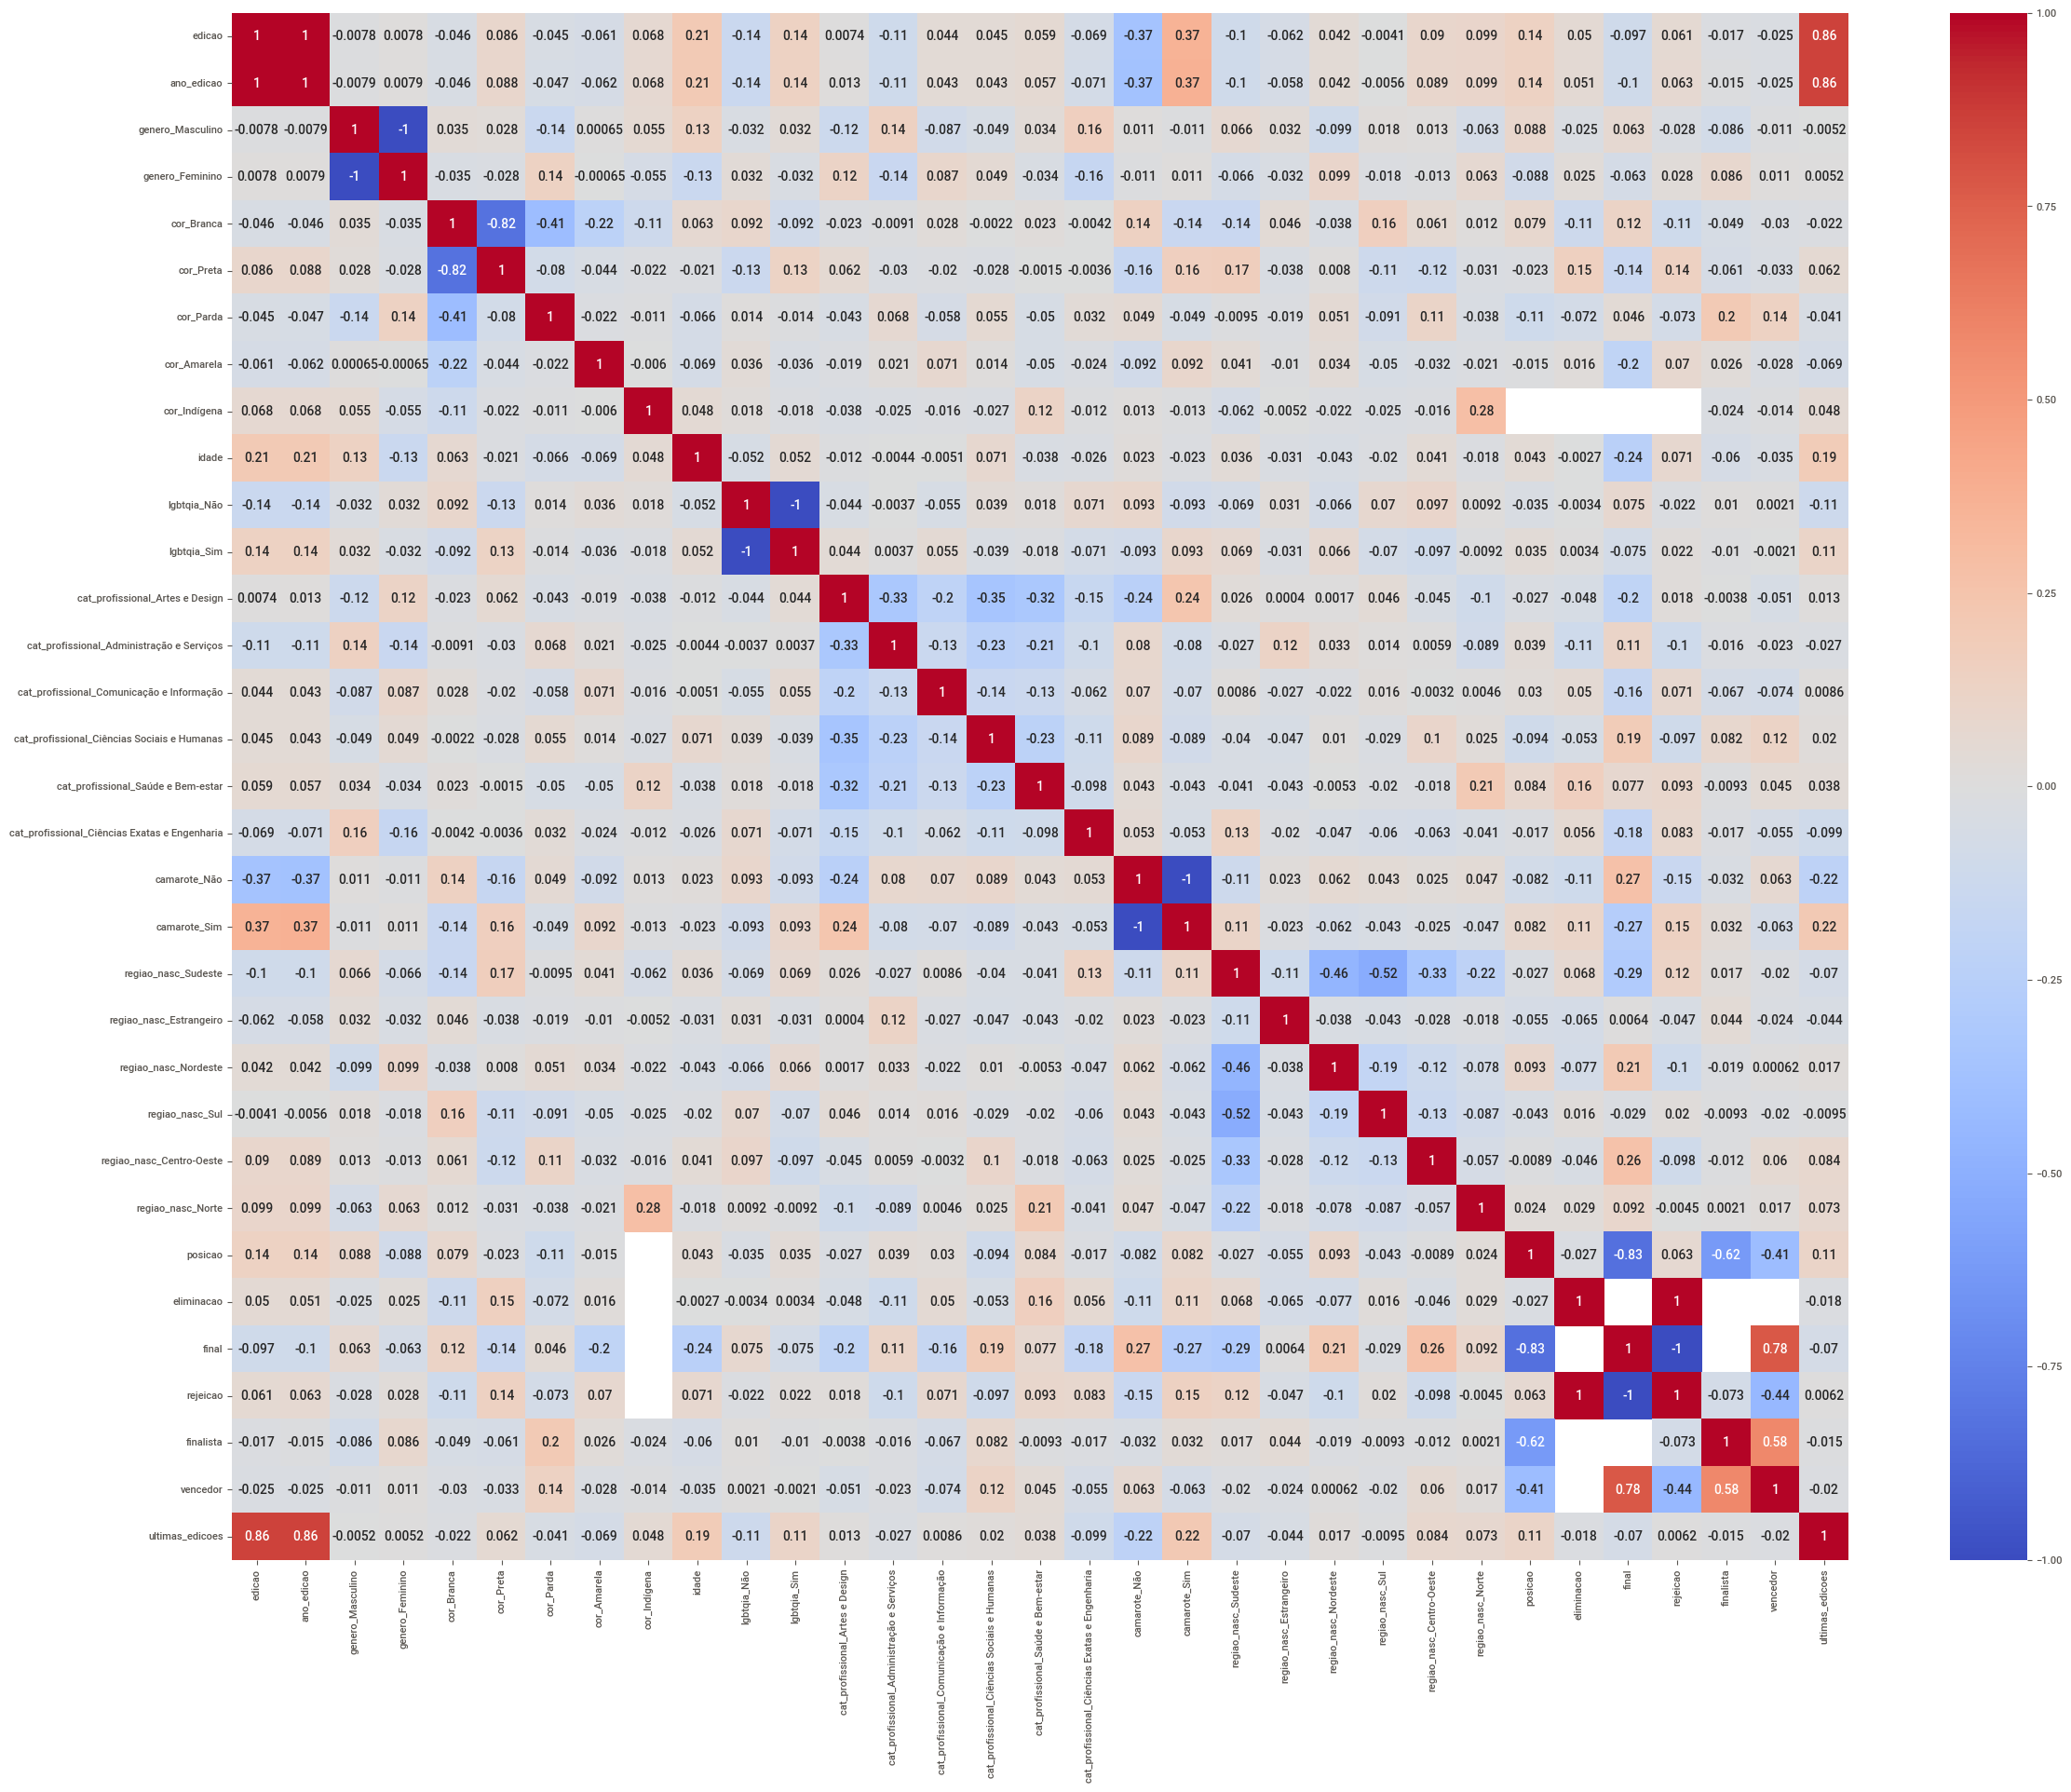

In [ ]:
plt.figure(figsize=(28,22))

correlacao = df.corr()
correlacao = (correlacao)
sns.heatmap(correlacao,xticklabels=correlacao.columns.values,yticklabels=correlacao.columns.values,annot=True,vmin=-1,vmax=1,cmap='coolwarm',linewidths=0)

correlacao

In [ ]:
# Remoção de colunas não significativas ao modelo de previsão
df_mdl = df.drop(['edicao', 'ano_edicao', 'nome', 'data_nascimento', 'profissao', 'cidade_nasc', 'estado_nasc', 'colocacao', 'indicacao', 'eliminacao', 'final', 'finalista', 'vencedor'],axis = 1)

In [ ]:
# Análise de variáveis que contém registros vazios
df_mdl.isnull().sum()

genero_Masculino                                  0
genero_Feminino                                   0
cor_Branca                                        0
cor_Preta                                         0
cor_Parda                                         0
cor_Amarela                                       0
cor_Indígena                                      0
idade                                             0
lgbtqia_Não                                       0
lgbtqia_Sim                                       0
cat_profissional_Artes e Design                   0
cat_profissional_Administração e Serviços         0
cat_profissional_Comunicação e Informação         0
cat_profissional_Ciências Sociais e Humanas       0
cat_profissional_Saúde e Bem-estar                0
cat_profissional_Ciências Exatas e Engenharia     0
camarote_Não                                      0
camarote_Sim                                      0
regiao_nasc_Sudeste                               0
regiao_nasc_

In [ ]:
# Remoção de registros que contém dados vazio
df_mdl.dropna(inplace=True)

In [ ]:
# Separando as variáveis entre preditoras e alvo
alvop = df_mdl['posicao']
alvor = df_mdl['rejeicao']
pred = df_mdl.drop(['posicao','rejeicao'],axis = 1)

In [ ]:
# Criando os conjuntos de dados de treino e teste
from sklearn.model_selection import train_test_split

predr_treino, predr_teste, alvor_treino, alvor_teste = train_test_split(pred, alvor, test_size = 0.2)

In [ ]:
predp_treino, predp_teste, alvop_treino, alvop_teste = train_test_split(pred, alvop, test_size = 0.2)

In [ ]:
# Criação dos modelos
from sklearn.ensemble import RandomForestRegressor
mdlp = RandomForestRegressor(n_estimators=100)
mdlp.fit(predp_treino, alvop_treino)

RandomForestRegressor()

In [ ]:
# Criação dos modelos
from sklearn.ensemble import RandomForestRegressor
mdlr = RandomForestRegressor(n_estimators=100)
mdlr.fit(predr_treino, alvor_treino)

RandomForestRegressor()

In [ ]:
# Analisando a importância de cada variável preditora para a geração de valor da variável alvo
mdlp.feature_importances_

array([0.04056978, 0.0345339 , 0.02204665, 0.02161737, 0.01926205,
       0.00087326, 0.        , 0.36272357, 0.01820294, 0.01517129,
       0.04494762, 0.03591606, 0.02264428, 0.04832475, 0.04655563,
       0.01275205, 0.01478868, 0.01945367, 0.03862791, 0.01209183,
       0.03817263, 0.0325813 , 0.02530089, 0.01458519, 0.05825673])

In [ ]:
# Analisando a importância de cada variável preditora para a geração de valor da variável alvo
mdlr.feature_importances_

array([0.03455906, 0.0375405 , 0.01901549, 0.04341103, 0.00982434,
       0.00694268, 0.        , 0.33641747, 0.01613082, 0.01759477,
       0.03736675, 0.03852819, 0.02350314, 0.0369922 , 0.0406071 ,
       0.01789601, 0.02280597, 0.02303098, 0.0440826 , 0.001865  ,
       0.04108551, 0.03000973, 0.04120603, 0.00757901, 0.07200563])

In [ ]:
# Aplicação do modelo para o conjunto de dados teste
previsoes_posicao = mdlp.predict(predp_teste)
previsoes_posicao

array([ 9.76666667,  7.74      ,  6.28      ,  7.11      ,  6.63033333,
        4.19      ,  8.9825    , 11.17      ,  6.905     ,  6.42      ,
        7.03      ,  9.46416667,  3.876     ,  7.12933333,  6.00428571,
        6.7825    ,  7.8475    , 10.8105    ,  9.32833333,  7.45      ,
        5.605     ,  6.84      , 10.12      ,  9.89366667,  5.45833333,
        7.851     , 10.34      ,  6.8325    ,  9.43      ,  8.94      ,
       11.3       ,  5.79166667,  5.53      ,  8.95216667, 10.74      ,
        7.9875    ,  8.97816667, 11.07      ,  8.64333333,  7.46      ,
        7.8505    ,  7.78      ,  9.60833333,  8.38      ,  7.21      ,
        8.915     ,  9.64      ,  6.765     ,  9.25133333, 16.65566667,
        5.67166667, 16.65566667,  5.746     , 10.01266667, 12.22466667,
        8.92833333, 12.61333333,  8.64333333,  8.87333333,  8.5345    ,
       11.80833333,  4.32      ,  8.15      , 11.12833333,  3.74125   ])

In [ ]:
# Aplicação do modelo para o conjunto de dados teste
previsoes_rejeicao = mdlr.predict(predr_teste)
previsoes_rejeicao

array([57.4996    , 58.550895  , 64.3618    , 68.26      , 65.7843    ,
       67.0817    , 59.5177    , 82.86466429, 57.18343333, 71.1205    ,
       64.99213333, 71.7343    , 59.152     , 69.78960714, 72.1877    ,
       81.694475  , 67.33536667, 63.5863    , 57.69353333, 61.8985    ,
       55.88514167, 50.53633333, 75.3061    , 57.01072   , 58.92983333,
       61.3831    , 62.6294    , 60.67310167, 69.3961    , 48.32625667,
       60.53373333, 75.7188    , 62.2859    , 66.23266667, 59.7418    ,
       69.25163333, 75.25456429, 65.6816    , 76.31026667, 63.0188    ,
       52.81159333, 65.8006    , 68.32585714, 78.4506    , 53.02185   ,
       61.91786667, 60.30885   , 64.7368    , 71.50885   , 60.29105   ,
       56.8063    , 66.6315    , 73.76563333, 65.60006667, 63.905375  ,
       59.082     , 53.45900833, 67.392525  , 63.6911    , 67.95085   ,
       55.404325  , 63.61906667, 62.6483    , 55.88566667, 68.870625  ])

In [ ]:
# Avaliação do modelo com MAE
from sklearn.metrics import mean_absolute_error
mean_absolute_error(alvop_teste, previsoes_posicao)

4.823254395604396

In [ ]:
mean_absolute_error(alvor_teste, previsoes_rejeicao)

13.413569989010991

In [ ]:
# Verificação e comparação dos resultados dos três primeiros registros do conjunto de dados teste
previsoes_posicao[0:10]

array([ 9.76666667,  7.74      ,  6.28      ,  7.11      ,  6.63033333,
        4.19      ,  8.9825    , 11.17      ,  6.905     ,  6.42      ])

In [ ]:
alvop_teste[0:10]

111    13.0
141    11.0
203     4.0
333    16.0
172     6.0
38     13.0
166    18.0
174     8.0
313    16.0
130    17.0
Name: posicao, dtype: float64

In [ ]:
# Verificação e comparação dos resultados dos três primeiros registros do conjunto de dados teste
previsoes_rejeicao[0:10]

array([57.4996    , 58.550895  , 64.3618    , 68.26      , 65.7843    ,
       67.0817    , 59.5177    , 82.86466429, 57.18343333, 71.1205    ])

In [ ]:
alvor_teste[0:10]

265    96.61
155    63.00
118    68.00
107    62.00
11     55.00
68     53.00
255    65.12
27     67.00
50     59.00
102    54.00
Name: rejeicao, dtype: float64